In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [2]:
CHARACTER_PATHS = r'./characters-1/'
IMAGE_WIDTH = 20
IMAGE_HEIGHT = 20

SVM_KERNEL = 'poly'
MODEL_NAME = 'svm_model.pkl'

In [3]:
images = os.listdir(CHARACTER_PATHS)


image_data = []
label_data = []
for index, image_path in enumerate(images):
    
    label = image_path.split('-')[0]
    image = cv2.imread(CHARACTER_PATHS + image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
    
    cv2.threshold(image, 127, 255, cv2.THRESH_BINARY, image)

    image = image.flatten()
    
    image_data.append(image)
    label_data.append(label)

In [4]:
Y = np.array(list(map(int, label_data)))
X = np.array(image_data)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
model = svm.SVC(kernel=SVM_KERNEL)

model.fit(X_train, Y_train)

SVC(kernel='poly')

In [7]:
Y_pred = model.predict(X_test)

In [8]:
accuracy = accuracy_score(Y_test, Y_pred)

print(accuracy)

0.7632743362831859


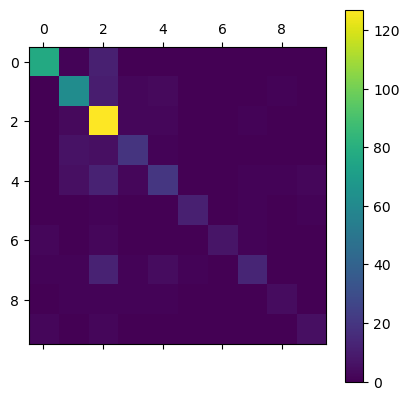

In [9]:
cfm = confusion_matrix(Y_test, Y_pred)

plt.matshow(cfm)
plt.colorbar()
plt.show()

In [10]:
report = classification_report(Y_test, Y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        89
           1       0.78      0.79      0.79        78
           2       0.69      0.94      0.80       135
           3       0.70      0.61      0.66        31
           4       0.65      0.47      0.54        43
           5       0.92      0.79      0.85        14
           6       1.00      0.58      0.74        12
           7       0.76      0.39      0.52        33
           8       0.67      0.50      0.57         8
           9       0.62      0.56      0.59         9

    accuracy                           0.76       452
   macro avg       0.77      0.65      0.69       452
weighted avg       0.77      0.76      0.75       452



In [11]:
with open(MODEL_NAME, 'wb') as f:
    pickle.dump(model, f)